In [1]:
# Predict Loan Eligibility for Dream Housing Finance company using 
# 1. Decision Tree Classifier 
# 2. Logistic Regression
# 3. K Nearest Neighbor
# 4. Random Forest
# 5. Support Vector Classifier

In [2]:
import numpy as np
import pandas as pd

In [3]:
# loading Train dataset
train_data=pd.read_csv("Dataset/train_data.csv")

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# loading Test dataset
test_data=pd.read_csv("Dataset/test_data.csv")

In [6]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
#check for null values in train data set
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#filling missing values in train dataset with mode i.e., NaN -> mode 
#1
train_data['Gender'].fillna(train_data['Gender'].mode().values[0],inplace=True)
#2
train_data['Married'].fillna(train_data['Married'].mode().values[0],inplace=True)
#3
train_data['Dependents'].fillna(train_data['Dependents'].mode().values[0],inplace=True)
#4
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode().values[0],inplace=True)
#5
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(),inplace=True)
#6
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)
#7
train_data['Credit_History'].fillna(train_data['Credit_History'].mean(),inplace=True)

#The mode() return 2 value, first is mode value second is count. So train['Gender'].mode()[0] means get the mode value of train['Gender'].

In [9]:
#checking for null/missing values after filling in
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
#now that missing values of train data set is filled lets check for the missing values in test data set
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
#fillin the missing values in test data set with its respected colummns mode value 
#1
test_data['Gender'].fillna(test_data['Gender'].mode().values[0],inplace=True)
#2
test_data['Dependents'].fillna(test_data['Gender'].mode().values[0],inplace=True)
#3
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode().values[0],inplace=True)
#4
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(),inplace=True)
#5
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean(),inplace=True)
#6
test_data['Credit_History'].fillna(test_data['Credit_History'].mean(),inplace=True)

In [12]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [13]:
# Data visualization
import matplotlib.pyplot as plt

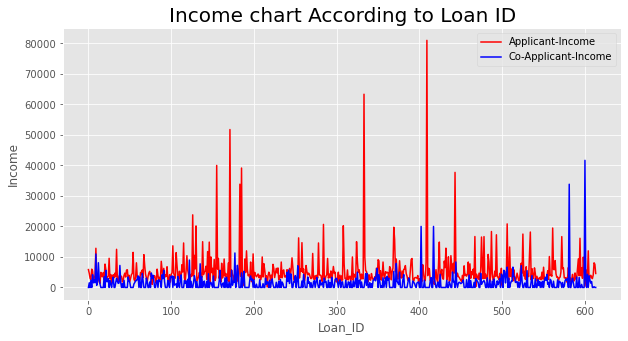

In [14]:
from matplotlib import style
style.use("ggplot")
plt.figure(figsize=(10,5))
plt.plot(train_data.index,train_data['ApplicantIncome'],color="r",label="Applicant-Income")
plt.plot(train_data.index,train_data['CoapplicantIncome'],color="b",label="Co-Applicant-Income")
plt.grid(color="white")
plt.xlabel("Loan_ID")
plt.ylabel("Income")
plt.title("Income chart According to Loan ID",fontsize=20)
plt.legend()
plt.show()

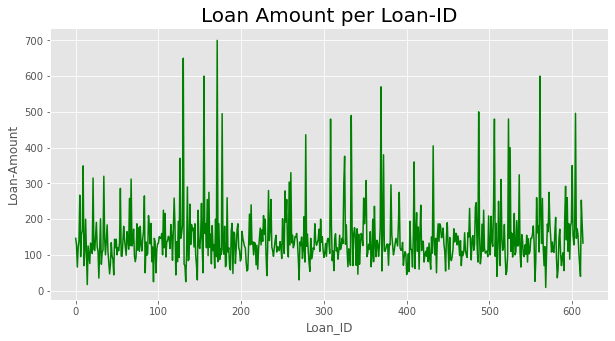

In [15]:
plt.figure(figsize=(10,5))
plt.plot(train_data.index,train_data['LoanAmount'],color="g")
plt.xlabel("Loan_ID")
plt.ylabel("Loan-Amount")
plt.title("Loan Amount per Loan-ID",fontsize=(20))
plt.show()

In [16]:
# LabelEncoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#1
train_data['Gender']=encoder.fit_transform(train_data['Gender'])
#2
train_data['Married']=encoder.fit_transform(train_data['Married'])
#3
train_data['Education']=encoder.fit_transform(train_data['Education'])
#4
train_data['Self_Employed']=encoder.fit_transform(train_data['Self_Employed'])
#5
train_data['Property_Area']=encoder.fit_transform(train_data['Property_Area'])
#6
train_data['Loan_Status']=encoder.fit_transform(train_data['Loan_Status'])
#7
train_data['Loan_ID']=encoder.fit_transform(train_data['Loan_ID'])
#8
train_data['Dependents']=encoder.fit_transform(train_data['Dependents'])

In [17]:
train_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1


In [18]:
# Now LabelEncoding test_data
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# no need to re declare it 
#1
test_data['Loan_ID']=encoder.fit_transform(test_data['Loan_ID'])
#2
test_data['Gender']=encoder.fit_transform(test_data['Gender'])
#3
test_data['Married']=encoder.fit_transform(test_data['Married'])
#4
test_data['Education']=encoder.fit_transform(test_data['Education'])
#5
test_data['Self_Employed']=encoder.fit_transform(test_data['Self_Employed'])
#6
test_data['Property_Area']=encoder.fit_transform(test_data['Property_Area'])
#7
test_data['Dependents']=encoder.fit_transform(test_data['Dependents'])

In [19]:
test_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2


In [20]:
test_data.shape

(367, 12)

In [21]:
train_data.shape

(614, 13)

In [22]:
# correlation of dataset
train_data.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


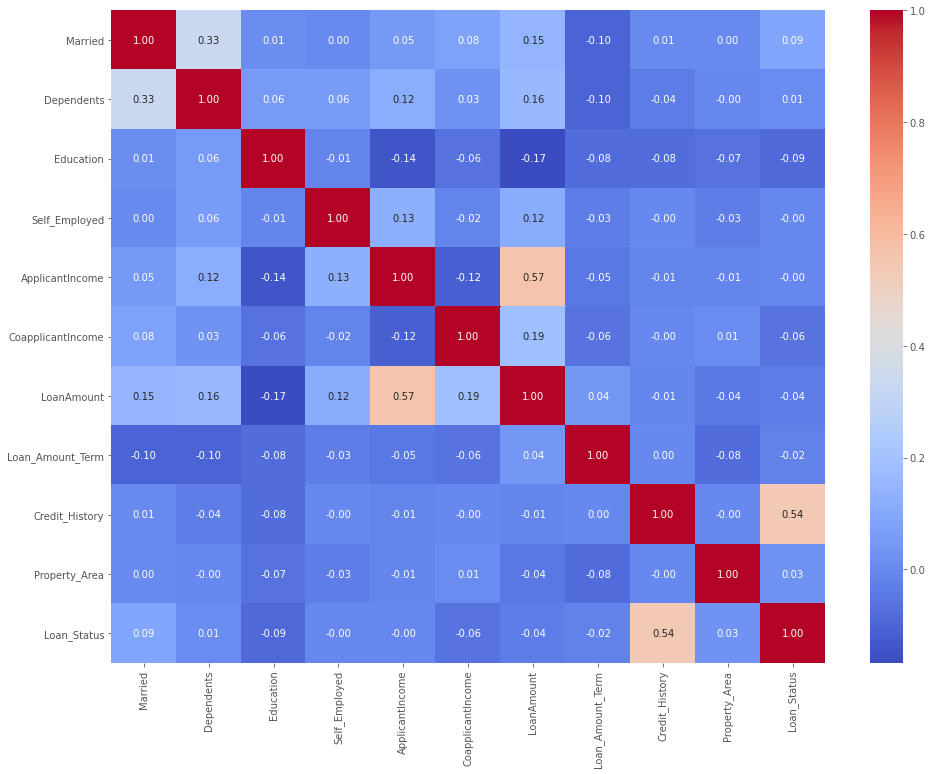

In [23]:
# 1. A heatmap is a numeric tabular data where the cells are colored depending on the values of the correlation. Higher the magnitude of correlation, darker the colour.
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(data=train_data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [24]:
train_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


In [25]:
test_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2


In [26]:
# train_data=train_data.drop('Loan_ID', axis = 1)
test_data=test_data.drop(columns=['Loan_ID'])


In [27]:
X = train_data.drop('Loan_Status',1)
X.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0


In [28]:
y = train_data.Loan_Status
y.head(2)

0    1
1    0
Name: Loan_Status, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)


In [30]:
#DECISION TREE CLASSIFIER

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
Dtree=DecisionTreeClassifier(random_state=1,criterion="entropy")

In [32]:
Dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [33]:
dt_pred_test=Dtree.predict(x_test)

In [34]:
print('Accuracy for testing set is:', accuracy_score(y_test,dt_pred_test))

Accuracy for testing set is: 0.7027027027027027


In [35]:
# Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.
dt_pred_train = Dtree.predict(x_train)
print('accuracy for training set is: ', accuracy_score(y_train,dt_pred_train))
# resulting 1.0 = 100%

accuracy for training set is:  1.0


In [36]:
# Check for overfitting and underfitting¶
# # print the scores on training and test set

# print('Training set score: {:.4f}'.format(Dtree.score(x_train, y_train)))

# print('Test set score: {:.4f}'.format(Dtree.score(x_test, y_test)))

In [155]:
# Visualize decision-trees
# plt.figure(figsize=(12,8))

# from sklearn import tree

# tree.plot_tree(Dtree.fit(x_train, y_train))

In [154]:
# import graphviz (NEED TO INSTALL LIBRARY)
# dot_data = tree.export_graphviz(Dtree, out_file=None, 
#                               feature_names=x_train.columns,  
#                               class_names=y_train,  
#                               filled=True, rounded=True,  
#                               special_characters=True)

# graph = graphviz.Source(dot_data) 
# graph 

In [ ]:
#LOGISTIC REGRESSION

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

In [43]:
lr.fit(x_train,y_train)

LogisticRegression()

In [44]:
lr_pred_test=lr.predict(x_test)

In [47]:
print('Accuracy for testing set is:', accuracy_score(y_test,lr_pred_test))

Accuracy for testing set is: 0.8108108108108109


In [48]:
# Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.
lr_pred_train = lr.predict(x_train)
print('accuracy for training set is: ', accuracy_score(y_train,lr_pred_train))

accuracy for training set is:  0.8065268065268065


In [172]:
# We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7948 while the test-set accuracy to be 0.8486. These two values are quite comparable. So, there is no sign of overfitting.

In [173]:
#K NEAREST NEIGHBOR (KNN)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10,metric="minkowski",p=2)

In [50]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [51]:
knn_pred_test=knn.predict(x_test)
print('accuracy for testing set is: ', accuracy_score(y_test,knn_pred_test))

accuracy for testing set is:  0.6432432432432432


In [52]:
# Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.
knn_pred_train = knn.predict(x_train)
print('accuracy for training set is: ', accuracy_score(y_train,knn_pred_train))

accuracy for training set is:  0.6806526806526807


In [181]:
#no underfitting or overfitting

In [182]:
#RANDOM FOREST CLASSIFIER

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [54]:
rf_pred_test=rf.predict(x_test)
print('accuracy for testing set is: ', accuracy_score(y_test,rf_pred_test))

accuracy for testing set is:  0.8054054054054054


In [55]:
# Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.
rf_pred_train=rf.predict(x_train)
print('accuracy for training set is: ', accuracy_score(y_train,rf_pred_train))

accuracy for training set is:  1.0


In [188]:
#SUPPORT VECTOR CLASSIFIER

In [56]:
from sklearn.svm import SVC
svc=SVC(kernel="linear",random_state=0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [57]:
svc_pred_test=svc.predict(x_test)
print('accuracy for testing set is: ', accuracy_score(y_test,svc_pred_test))

accuracy for testing set is:  0.8162162162162162


In [58]:
# Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.
svc_pred_train=svc.predict(x_train)
print('accuracy for training set is: ', accuracy_score(y_train,svc_pred_train))

accuracy for training set is:  0.7948717948717948


In [60]:
print('FINAL CONCLUSION AND ACCURACIES ')
print('\n')
print('DECISION TREE CLASSIFIER')
print('accuracy for testing set is: ', accuracy_score(y_test,dt_pred_test))
print('accuracy for training set is: ', accuracy_score(y_train,dt_pred_train))
print('\n')
print('LOGISTIC REGRESSION')
print('accuracy for testing set is: ', accuracy_score(y_test,lr_pred_test))
print('accuracy for training set is: ', accuracy_score(y_train,lr_pred_train))
print('\n')
print('K NEAREST NEIGHBORS')
print('accuracy for testing set is: ', accuracy_score(y_test,knn_pred_test))
print('accuracy for training set is: ', accuracy_score(y_train,knn_pred_train))
print('\n')
print('RANDOM FOREST CLASSIFIER') 
print('accuracy for testing set is: ', accuracy_score(y_test,rf_pred_test))
print('accuracy for training set is: ', accuracy_score(y_train,rf_pred_train))
print('\n')
print('SUPPORT VECTOR CLASSIFIER')
print('accuracy for testing set is: ', accuracy_score(y_test,svc_pred_test))
print('accuracy for training set is: ', accuracy_score(y_train,svc_pred_train))

FINAL CONCLUSION AND ACCURACIES 


DECISION TREE CLASSIFIER
accuracy for testing set is:  0.7027027027027027
accuracy for training set is:  1.0


LOGISTIC REGRESSION
accuracy for testing set is:  0.8108108108108109
accuracy for training set is:  0.8065268065268065


K NEAREST NEIGHBORS
accuracy for testing set is:  0.6432432432432432
accuracy for training set is:  0.6806526806526807


RANDOM FOREST CLASSIFIER
accuracy for testing set is:  0.8054054054054054
accuracy for training set is:  1.0


SUPPORT VECTOR CLASSIFIER
accuracy for testing set is:  0.8162162162162162
accuracy for training set is:  0.7948717948717948


In [61]:
print('i think the highest accuracy is SVC model so its the best fit ')

i think the highest accuracy is SVC model so its the best fit 
